### Streaming

In [1]:
import os
from dotenv import load_dotenv

load_dotenv()

os.environ['OPENAI_API_KEY'] = os.getenv("OPENAI_API_KEY")

In [8]:
from typing_extensions import TypedDict
from typing import Annotated
from langgraph.graph.message import add_messages
from langchain_core.messages import AnyMessage, HumanMessage

class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

In [4]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-4o")

In [5]:
## Node Defining 
def tool_calling_llm(state:State):
    response = llm.invoke(state["messages"])
    return {"messages":[response]} 

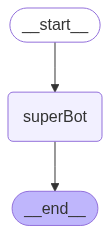

In [7]:
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display
from langgraph.checkpoint.memory import MemorySaver

## In System memory
memory = MemorySaver()

## Creating the Graph
graph = StateGraph(State)

## Adding the Node
graph.add_node("superBot", tool_calling_llm)

## Adding the Edges
graph.add_edge(START, "superBot")
graph.add_edge("superBot", END)

## Compile the Graph
graph_builder = graph.compile(checkpointer=memory)

# Displaying the graph
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [10]:
## Specify the thread
config = {"configurable":{"thread_id":"1"}}

for chunk in graph_builder.stream({"message":"Hi, my name is Hitesh and I like dancing."}, config, stream_mode="updates"):
    print(chunk)

{'superBot': {'messages': [AIMessage(content='Hi Hitesh! It’s great to meet someone who enjoys dancing. What styles of dance do you like, or are you trying out any new dance styles recently?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 34, 'prompt_tokens': 58, 'total_tokens': 92, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_07871e2ad8', 'id': 'chatcmpl-BcVa1OKOyJDL1TjSQvS2eWSNuXyRj', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--5ee9cc47-015b-415d-a5b7-f51008993c53-0', usage_metadata={'input_tokens': 58, 'output_tokens': 34, 'total_tokens': 92, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}}


In [ ]:
## Specify the input
messages = [HumanMessage("hi, my name is Hitesh and I like dancing.")]
messages = graph_builder.invoke({"messages": messages}, config=config)

for message in messages["messages"]:
    message.pretty_print()